In [ ]:
# ----------------------- SOME BASICS ABOUT STOCK MARKET ------------------
# OPEN -> the price in which the stock opens at the day
# CLOSE -> the last trading price of the stock 
# LOW -> the lowest price in the day
# HIGH -> the highets price in the day
# VOLUME -> the no. of stocks traded in that day
# -------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving prices-split-adjusted4.csv to prices-split-adjusted4.csv


In [ ]:
data = pd.read_csv("prices-split-adjusted4.csv")
df = pd.DataFrame(data)
df.tail()

,date,symbol,open,close,low,high,volume
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [ ]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
# showing column wise %ge of NaN values they contains 

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)

date 	-	 0.0
symbol 	-	 0.0
open 	-	 0.0
close 	-	 0.0
low 	-	 0.0
high 	-	 0.0
volume 	-	 0.0


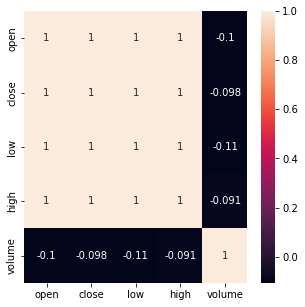

In [ ]:
df = df[df['symbol']=='AAP']   # Choosin stock values for any company 

cormap = df.corr() # correlated values in range -1 to +1
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [ ]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df

In [ ]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.999382
close,1.000000
low,0.999615
high,0.999737


In [ ]:
df = df[top_corelated_values.index]
df.head()

,open,close,low,high
253,40.700001,40.380001,40.360001,41.040001
720,40.299999,40.139999,39.720001,40.310001
1188,40.049999,40.490002,40.049999,40.779999
1656,39.549999,40.480000,39.549999,40.540001
2124,40.250000,40.639999,40.110001,40.820000


In [ ]:
df.shape

(1762, 4)

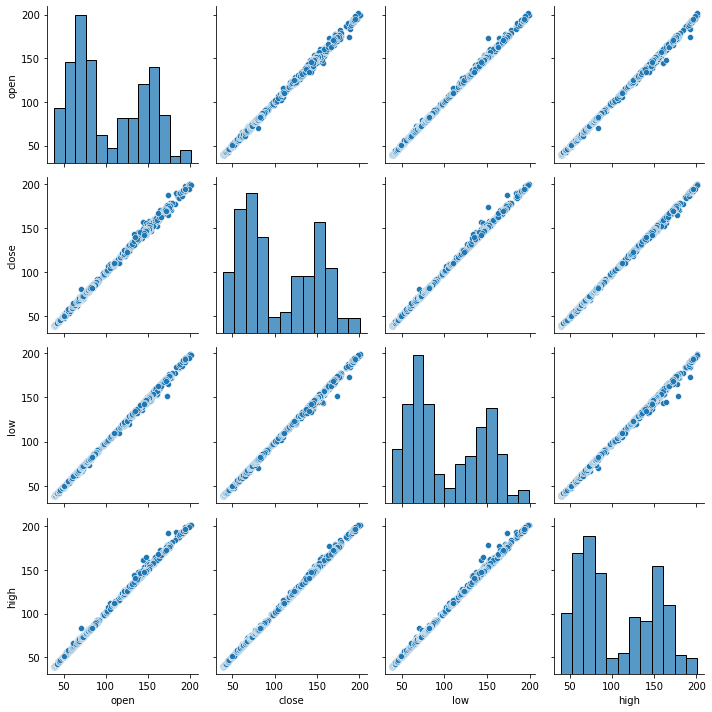

In [ ]:
sns.pairplot(df)
plt.tight_layout()

In [ ]:
# OPEN HIGH LOW ARE DEPENDENT 
# CLOSE IS THE ONLY INDEPENDENT FEATURE
X = df.drop(['close'], axis=1)  
y = df['close']

In [ ]:
#------------------------- SCALING -----------------
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.012001,0.012392,0.010256
1,0.009539,0.008387,0.005746
2,0.008000,0.010452,0.008649
3,0.004923,0.007323,0.007167
4,0.009231,0.010827,0.008897


In [ ]:
#----------------- SPLITTING THE DATASET --------------------

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [ ]:
#--------------------- LINEAR REGRESSION ---------------------
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
675111,173.660004,173.682489
675608,171.919998,172.593759
676105,172.000000,171.182789
676602,187.789993,187.980305
677099,187.029999,188.440838


In [ ]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9931342019332019


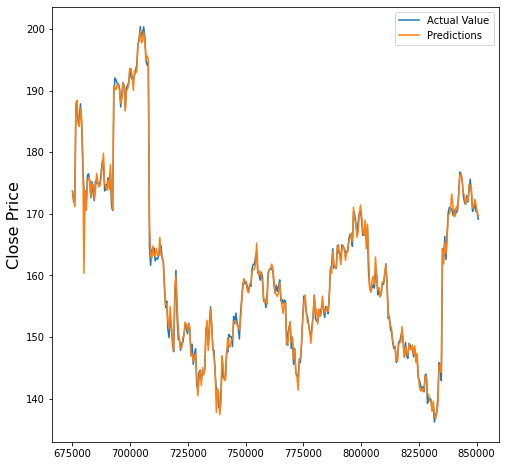

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [ ]:

#---------------- ARTIFICIAL NEURAL NETWORKS (ANN) ----------------------
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [ ]:
# Model Training

model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

Epoch 1/70
36/36 [==============================] - 1s 7ms/step - loss: 6058.6362 - val_loss: 22090.3359
Epoch 2/70
36/36 [==============================] - 0s 2ms/step - loss: 6049.6616 - val_loss: 22055.8281
Epoch 3/70
36/36 [==============================] - 0s 2ms/step - loss: 6023.3926 - val_loss: 21917.8340
Epoch 4/70
36/36 [==============================] - 0s 2ms/step - loss: 5936.6777 - val_loss: 21459.3984
Epoch 5/70
36/36 [==============================] - 0s 2ms/step - loss: 5699.8608 - val_loss: 20291.0527
Epoch 6/70
36/36 [==============================] - 0s 2ms/step - loss: 5183.0381 - val_loss: 17966.3164
Epoch 7/70
36/36 [==============================] - 0s 2ms/step - loss: 4282.4668 - val_loss: 14197.9248
Epoch 8/70
36/36 [==============================] - 0s 2ms/step - loss: 3006.8044 - val_loss: 9305.0039
Epoch 9/70
36/36 [==============================] - 0s 2ms/step - loss: 1606.6122 - val_loss: 4593.0898
Epoch 10/70
36/36 [==============================] - 0s 2

In [ ]:
# Prediction

y_pred_2 = model_2.predict(X_test)

In [ ]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,174.020767
675608,171.919998,172.336182
676105,172.000000,170.561218
676602,187.789993,179.439148
677099,187.029999,188.062988


In [ ]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9869314588172408


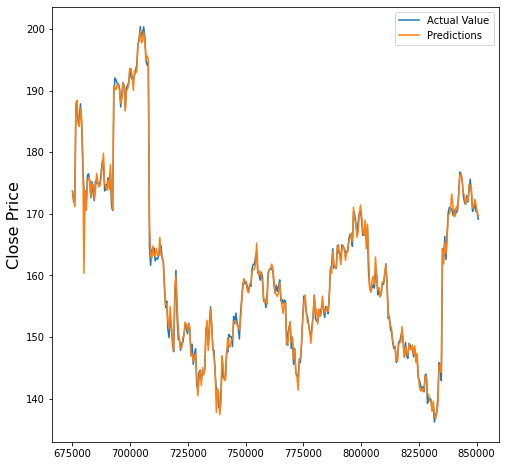

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [ ]:
#---------------------- CONVOLUTION NEURAL NETWORKS (CNN) ---------------------

X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1)) #output
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [ ]:
# Model Training

model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 1s 12ms/step - loss: 5557.4590 - val_loss: 10596.2637
Epoch 2/100
36/36 [==============================] - 0s 7ms/step - loss: 459.6400 - val_loss: 1.7634
Epoch 3/100
36/36 [==============================] - 0s 6ms/step - loss: 9.6347 - val_loss: 2.0670
Epoch 4/100
36/36 [==============================] - 0s 6ms/step - loss: 0.7839 - val_loss: 1.9936
Epoch 5/100
36/36 [==============================] - 0s 6ms/step - loss: 0.5163 - val_loss: 1.7338
Epoch 6/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4539 - val_loss: 1.6509
Epoch 7/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4436 - val_loss: 1.9061
Epoch 8/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4461 - val_loss: 1.8450
Epoch 9/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4524 - val_loss: 1.8982
Epoch 10/100
36/36 [==============================] - 0s 6ms/step - loss: 0.4390 - val_loss: 1.8068

In [ ]:
# Prediction

y_pred_3 = model_3.predict(X_test)

In [ ]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,174.265701
675608,171.919998,172.627914
676105,172.000000,170.823166
676602,187.789993,179.986679
677099,187.029999,188.522049


In [ ]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9885228623657073


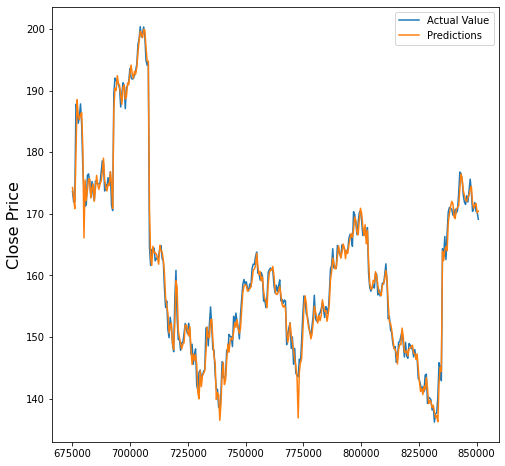

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

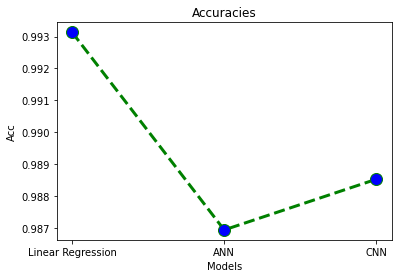

In [ ]:
# ------------------- COMPARING THE 3 MODELS ------------------------

plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()